# Project 8 - Movie Recommendations with Document Similarity

Clustering is one of the most important Unsupervised Machine Learning Techniques. These algorithms come in handy, especially in situations where labelled data is a luxury. Clustering techniques help us understand the underlying patterns in data (more so around them being similar) along with the ability to bootstrap certain supervised learning approaches as well.

![](avengers.jpg)

Clustering techniques have been studied in depth over the years and there are some very powerful clustering algorithms available. For this tutorial, we will be working with a movie dataset containing movie plot, cast, genres and related other information. We will be working with __K-Means__ and __Ward-Hierarchical-Clustering__ methods.

# Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('tmdb_5000_movies.csv.gz', compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [2]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
title          4800 non-null object
tagline        4800 non-null object
overview       4800 non-null object
genres         4800 non-null object
popularity     4800 non-null float64
description    4800 non-null object
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


In [4]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


## Your Turn: Cluster Similar Movies

Here you will learn how to cluster text documents (in this case movies). We will use the following pipeline:
- Text pre-processing
- Feature Engineering
- Clustering Using K-Means
- Finding Optimal Value for K
- Prepare Movie Clusters

Clustering is an unsupervised approach to find groups of similar items in any given dataset. There are different clustering algorithms and __K-Means__ is a pretty simple yet affect one. Most movies span different emotions and can be categorized into multiple genres (same is the case with movies listed in our current dataset). Can clustering of movie descriptions help us understand these groupings?

Similarity analysis (in the previous section) was a good starting point, but can we do better? 

## Text pre-processing

We will do some basic text pre-processing on our movie descriptions before we build our features

In [5]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

## Extract TF-IDF Features

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2,stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])
tfidf_matrix.shape

C:\Anaconda2\envs\python3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(4800, 19029)

## Cluster Movies using K-Means

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
kmeans = KMeans(n_clusters=2, max_iter=100,random_state=42).fit(tfidf_matrix)

### Check Movie Distribution Across Clusters

In [9]:
Counter(kmeans.labels_)

Counter({0: 4202, 1: 598})

## Identifying K

Since most movies are a combination of emotions, stories, characters, scenary, etc, let us try and utilize K-means to see if the movies can be grouped into common themes capturing some of these underlying aspects.

One challenge we face while working with K-Means is finding the right value of K. To do so, there are a few heuristics like _the silhouette_score_ and the _elbow_ method. 

### Sillhouette Score
Silhouette Scoring helps in quantifying interpretation and validation of consistency within clusters of data. 
The silhouette score value quantifies how similar an item is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from −1 to +1, where a high value indicates well placed item. A negative score indicates that there may be too many or too few clusters.

### Elbow Method
This method requires us to run k-means clustering on a given dataset for a range of values of k. Then for each value of k, we calculate sum of squared errors (SSE).

The next step is to plot a line graph of the SSE aganist each value of k. The line graph looks like an arm, the _elbow_ on the arm is the value of optimal k (number of cluster). 
The goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

The following snippet loops through different values of K, generates the silhouette scores as well the elbow plot to help us narrow down to the optimal value of K

In [10]:
def identify_k(feature_matrix, min_k=2,max_k=3):
    sse = {}
    for k in range(min_k,max_k):
        kmeans = KMeans(n_clusters=k, max_iter=100,random_state=42).fit(feature_matrix)
        sil_coeff = silhouette_score(tfidf_matrix, 
                                     kmeans.labels_, 
                                     metric='euclidean')
        print("For K={}, Silhouette Coefficient = {}".format(k, sil_coeff))
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_ 
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("K")
    plt.ylabel("SSE")
    plt.show()

### Your Turn
Find the optimal value of K

For K=2, Silhouette Coefficient = 0.0007821638427931633
For K=3, Silhouette Coefficient = 0.0008587362998777968
For K=4, Silhouette Coefficient = 0.00130994835887977
For K=5, Silhouette Coefficient = 0.0013523524222997245
For K=6, Silhouette Coefficient = 0.0015584281863840887
For K=7, Silhouette Coefficient = 0.0016901861249773197


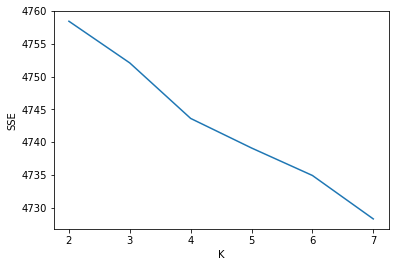

In [11]:
identify_k(tfidf_matrix,2,8)

### Set Cluster Labels
For the current scenario, let us set __K=4__ and assign cluster labels to each of the movies in our dataset

In [12]:
kmeans = KMeans(n_clusters=4, max_iter=100,random_state=42).fit(tfidf_matrix)

In [13]:
df["cluster_label"] = kmeans.labels_

In [14]:
df.cluster_label.value_counts()

0    2597
3    1785
2     211
1     207
Name: cluster_label, dtype: int64

### Extract Cluster Details

Each cluster constitutes movies which have some underlying aspects which are common.
We also understand that cluster centers are in a way representatives of the whole cluster. Let us utilize this understanding to extract top common features amongst clusters.

In [15]:
def get_cluster_details(clustering_obj, movie_data, 
                     feature_names, num_clusters,
                     topn_features=10):

    cluster_details = {}  
    # get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    
    # get key features for each cluster
    # get movies belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] 
                        for index 
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        movies = movie_data[movie_data['cluster_label'] == cluster_num]['title'].values.tolist()
        cluster_details[cluster_num]['movies'] = movies
    
    return cluster_details

In [16]:
def print_cluster_details(cluster_data,n_movies=5):
    # print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print('Cluster {} details:'.format(cluster_num))
        print('-'*20)
        print('Key features:', cluster_details['key_features'])
        print('Movies in this cluster:')
        print(', '.join(cluster_details['movies'][:n_movies]))
        print('='*40)

### Your Turn

Extract Cluster Details

In [17]:
cluster_data =  get_cluster_details(clustering_obj=kmeans,
                                 movie_data=df,
                                 feature_names=tf.get_feature_names(),
                                 num_clusters=4,
                                 topn_features=5)         

In [18]:
print_cluster_details(cluster_data) 

Cluster 0 details:
--------------------
Key features: ['world', 'time', 'man', 'new', 'team']
Movies in this cluster:
Avatar, Spectre, The Dark Knight Rises, John Carter, Spider-Man 3
Cluster 1 details:
--------------------
Key features: ['york', 'new york', 'new', 'york city', 'city']
Movies in this cluster:
King Kong, Captain America: The Winter Soldier, I Am Legend, Bolt, Bee Movie
Cluster 2 details:
--------------------
Key features: ['school', 'high school', 'high', 'teacher', 'students']
Movies in this cluster:
Monsters University, The Amazing Spider-Man 2, Spider-Man, Harry Potter and the Philosopher's Stone, Grown Ups 2
Cluster 3 details:
--------------------
Key features: ['life', 'love', 'story', 'family', 'young']
Movies in this cluster:
Pirates of the Caribbean: At World's End, Harry Potter and the Half-Blood Prince, Man of Steel, The Chronicles of Narnia: Prince Caspian, Pirates of the Caribbean: On Stranger Tides


## Hierarchical Clustering
So far, we were successfull in clustering movies using __K-Means__. But is there any further level of understanding we can extract from this dataset in an unsupervised manner?

Hierarchical Clustering to the rescue. K-Means helped us understand similarities amongst movies, with hierarchical clustering we can aim at understanding abstract or higher level concepts which are common across groups of movies. There are primarily two ways in which hierarchical clustering can be performed:

- Divisive : The algorithm begins with every element in one big generic cluster and then goes on dividing them into specific clusters in a recursive manner.
- Agglomerative : In this case, the algorithm starts by placing every element into a cluster of its own and then goes on merging them into more general clusters in a recursive manner (till they all merge into one big cluster).

For this tutorial, we will work with __Ward clustering algorithm__. Ward clustering is an agglomerative clustering method, i.e. at each stage, the pair of clusters with minimum _between-cluster distance_ (or wcss) are merged. 

To work with Ward Clustering Algorithm, we perform the following steps:
-  Prepare a cosine distance matrix
-  Calclate a linkage_matrix
-  Plot the hierarchical structure as a dendrogram.  

In [19]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

### Calculate Linkage Matrix using Cosine Similarity

In [20]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

### Plot Hierarchical Structure as a Dendrogram

In [21]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

### Your Turn

Use the above prepare utilities to perform hierarchical clustering and generate a dendrogram

In [22]:
linkage_matrix = ward_hierarchical_clustering(tfidf_matrix)

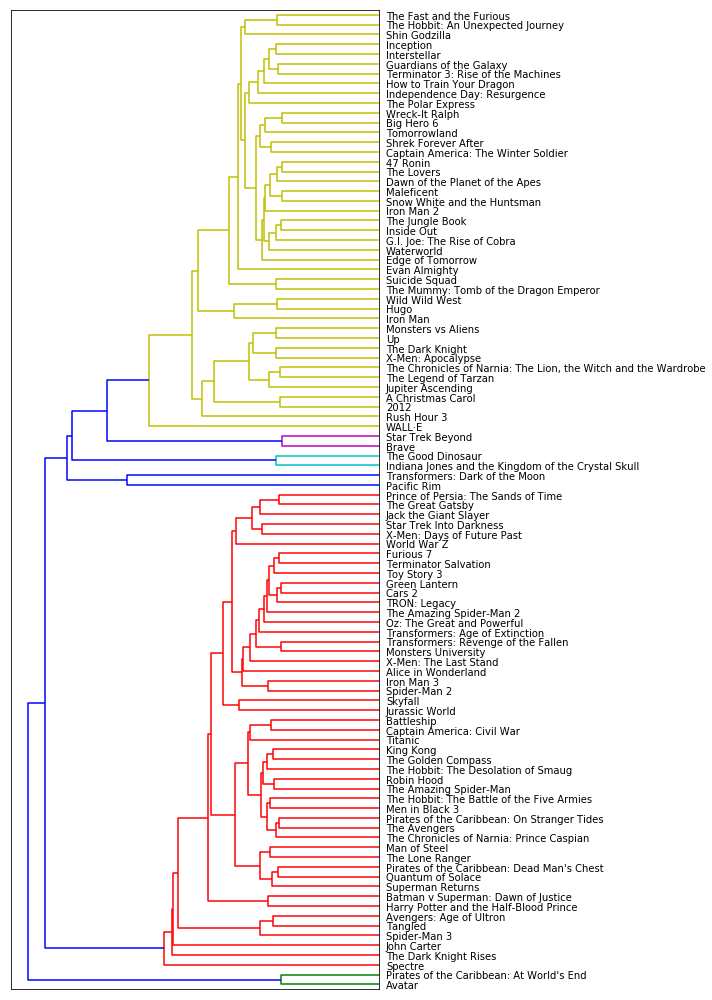

In [23]:
plot_hierarchical_clusters(linkage_matrix=linkage_matrix,
                           movie_data=df,
                           figure_size=(10,14))